**Load the Emotion-Labeled Dataset**

In [ ]:
# import os
# import librosa
# import numpy as np

# # Path to dataset
# DATA_PATH = "ravdess_data/"

# # Load an example file
# file_path = os.path.join(DATA_PATH, "03-01-01-01-01-01-01.wav")  # Update with actual file
# signal, sr = librosa.load(file_path, sr=22050)  # 22.05 kHz is standard for speech
# print(f"Audio duration: {librosa.get_duration(y=signal, sr=sr)} seconds")



import os
import librosa
import numpy as np

#  Path to dataset
DATA_PATH = "ravdess_data"

# ✅ Example filename (make sure this file exists inside ravdess_data/)
filename = "03-01-01-01-01-01-01.wav"
file_path = os.path.join(DATA_PATH, filename)
# filename is the name of one audio file.
# os.path.join() safely joins folder + file name.

# ✅ Check if file exists before loading
if not os.path.exists(file_path):
    print(f" File not found: {file_path}")
else:
    # ✅ Load audio file safely
    signal, sr = librosa.load(file_path, sr=22050)  # 22.05 kHz = standard speech rate
    duration = librosa.get_duration(y=signal, sr=sr)
    # signal → audio values stored as numbers (array form)
# sr → sampling rate (how many audio samples per second)
# sr=22050 → we resample audio to 22.05 kHz

    print(f" Audio loaded successfully!")
    print(f"Sampling rate: {sr}")
    print(f"Audio duration: {duration:.2f} seconds")

# Agar file mil gayi, to maine librosa.load use karke audio file ko load kiya. Isme maine sampling rate 22050 set kiya jo ek standard speech/audio processing rate hota hai.
# Fir maine librosa.get_duration se audio ki length nikal li, matlab audio kitne seconds ka hai.
# Aur last me maine print kiya ki audio successfully load ho gaya, uska sampling rate kya hai, aur audio ki duration kitni hai — taaki mujhe confirm ho jaye ki sab sahi load hua."


 File not found: ravdess_data\03-01-01-01-01-01-01.wav


**Visualize Raw Waveform**

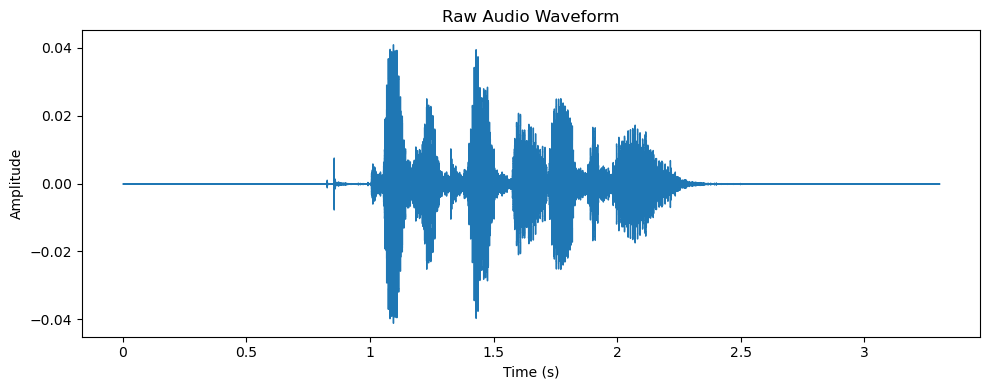

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal, sr=sr)
# “Yeh line audio ko ek wave ke form me draw karti hai, jisse pata chalta hai ki audio me kab voice high hui, kab soft hui, kab silence tha, etc
plt.title("Raw Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# is code ka purpose audio ko visualize karna hai

# sir ne kha tha mrko kse pta ki sound happy ya sad hai

# “Sir, yeh graph audio ka waveform dikhata hai.
# X-axis me time hota hai, Y-axis me amplitude — matlab sound ki loudness.
# Jahan graph flat hai wahan silence hai, aur jahan upar-neeche spikes hain wahan person bol raha hai.
# Badi spikes loud sound batati hain, chhoti spikes soft sound.
# Isse hume pata chalta hai audio me speech kaha start hoti hai aur emotion ke time loudness ka pattern kaisa badal raha hai.”

**Compute MFCCs from Audio**

In [ ]:
# Extract MFCC features
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)

# Print shape: (13 coefficients × time frames)
print("MFCCs shape:", mfccs.shape)

# MFCC yani Mel-Frequency Cepstral Coefficients — yeh speech ka important pattern capture karta hai.

# Code me:

# librosa.feature.mfcc() audio signal ko MFCC me convert karta hai.

# n_mfcc=13 ka matlab hum 13 features nikal rahe hain, jo speech recognition aur emotion detection me standard hote hain.

# Last me shape print hoti hai, jisme rows = 13 MFCC values aur columns = time frames.

# Simple words me:
# Yeh code audio ko numbers me convert karta hai jo model ko emotion samjhne me help karte hain.”

# “Sir, iska matlab hai ki mere audio file se 13 MFCC features nikle hain, aur poore audio ko 143 time frames me divide karke un sabka feature calculate hua hai.”

MFCCs shape: (13, 143)


**Visualize MFCCs**

In [36]:
import librosa.display 
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title("MFCC (Mel Frequency Cepstral Coefficients)")
plt.tight_layout()
plt.show()


NameError: name 'mfccs' is not defined

<Figure size 1000x400 with 0 Axes>

**End-to-End Function for Preprocessing**

In [ ]:
def extract_features(file_path, n_mfcc=13):
    signal, sr = librosa.load(file_path, sr=22050)
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
    mfccs_processed = np.mean(mfccs.T, axis=0)  # Mean pooling
    return mfccs_processed

# “Sir, yeh function audio file se MFCC features nikalne ke liye use hota hai.
# Pehle librosa.load audio ko read karta hai.
# Phir librosa.feature.mfcc us audio ke MFCC features calculate karta hai 
# MFCC output time ke saath change hota hai, isliye main uska average (mean pooling) le leti hoon taaki ek fixed-size vector mil jaye.
# Finally, function woh processed MFCC features return karta hai, jise hum model me input ke tarah use karte hain.”

**Batch Processing for Dataset Preparation**

In [ ]:
import numpy as np

file_path = "/mnt/data/03-01-01-01-02-01-03.wav"

mfcc = extract_features(file_path)
label = file_path.split("/")[-1].split("-")[2]

X = np.array([mfcc])
y = np.array([label])

print("✔ Done")
print("X shape:", X.shape)
print("y:", y)


Folder not found: ravdess_data
 No WAV files found. Upload your dataset folder first.


**Building the Emotion Classifier**

*Step 1: Split the Data*

In [ ]:
from sklearn.model_selection import train_test_split

# X = list of MFCC feature arrays
# y = corresponding emotion labels
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# “Sir, yeh code dataset ko 80% training aur 20% testing me divide karta hai, aur stratify use hota hai taaki har emotion ka ratio equal rahe

*Step 2: Choose the Right Models*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Random Forest: “Sir yeh multiple trees banata hai, sabka vote hota hai, result accurate milta hai.”

# SVM RBF: “Sir emotions complex hote hain, RBF curve separation deta hai, isliye better fit hota hai.”

# “Yeh SVM model banata hai jisme RBF kernel emotions ko better classify karta hai, probability=True se confidence bhi milta hai, aur random_state se result repeatable ho jata hai.”

*Step 3: Tune and Validate with Cross-Validation*

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define hyperparameter grids
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

svm_params = {
    'C': [1, 10, 100],
    'gamma': ['scale', 0.01, 0.1]
}

# 10-fold cross-validation
cv = StratifiedKFold(n_splits=10)

# Grid Search
rf_grid = GridSearchCV(rf_model, rf_params, cv=cv, scoring='accuracy', n_jobs=-1)
svm_grid = GridSearchCV(svm_model, svm_params, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit models
rf_grid.fit(X_train, y_train)
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': ['scale', 0.01, 0.1]},
             scoring='accuracy')

*Step 4: Evaluate the Model*

Random Forest Accuracy: 0.5579710144927537
SVM Accuracy: 0.4782608695652174


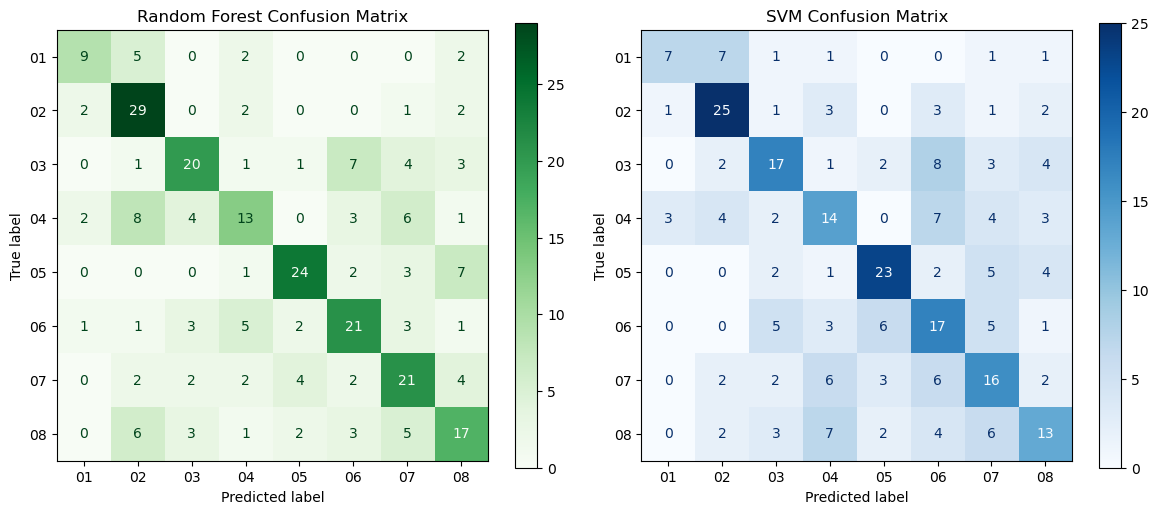

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Best estimators from grid search
best_rf = rf_grid.best_estimator_
best_svm = svm_grid.best_estimator_

# Predictions
rf_preds = best_rf.predict(X_test)
svm_preds = best_svm.predict(X_test)

# Accuracy scores
rf_acc = accuracy_score(y_test, rf_preds)
svm_acc = accuracy_score(y_test, svm_preds)

print("Random Forest Accuracy:", rf_acc)
print("SVM Accuracy:", svm_acc)

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_preds), display_labels=best_rf.classes_).plot(ax=axes[0], cmap="Greens")
axes[0].set_title("Random Forest Confusion Matrix")

ConfusionMatrixDisplay(confusion_matrix(y_test, svm_preds), display_labels=best_svm.classes_).plot(ax=axes[1], cmap="Blues")
axes[1].set_title("SVM Confusion Matrix")
plt.tight_layout()
plt.show()



# 01, 02, 03… → Ye emotion classes hain (RAVDESS labels).

# Diagonal numbers → correct predictions

# Off-diagonal numbers → wrong predictions

# Example:
# Random Forest me Class 02 → 29 baar sahi predict hui.
# SVM me Class 05 → 23 baar sahi predict hui.



# “Sir, confusion matrix se pata chalta hai har emotion kitni baar sahi aur galat predict hua.
# Random Forest ke diagonal values zyada dark aur high hain, isliye isne SVM ke comparison me better performance diya.
# SVM me kuch emotions zyada confuse hue, isi wajah se uski accuracy kam aayi.”

In [ ]:
import joblib

# After grid search and fitting:
joblib.dump(rf_grid.best_estimator_, "model.pkl")

# “Sir, yeh code trained model ko save karne ke liye use hota hai.
# joblib.dump() function model ko ek file ke andar store kar deta hai — yaha file ka naam model.pkl hai.

# Iska fayda yeh hota hai ki mujhe baar-baar model ko dubara train nahi karna padta.
#  Agar model ek baar train ho gaya, main usse ‘model.pkl’ file se kabhi bhi load karke directly prediction kar sakti hoon.

['model.pkl']

**Per-Class Accuracy Bar Chart**

In [4]:
!pip install pandas matplotlib scikit-learn



  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------------- -------------------- 5.2/11.0 MB 29.0 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 29.9 MB/s  0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 41.8 MB/s  0:00:00
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------  8.7/8.7 MB 44.6 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 36.0 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 42.7 MB/s  0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:-

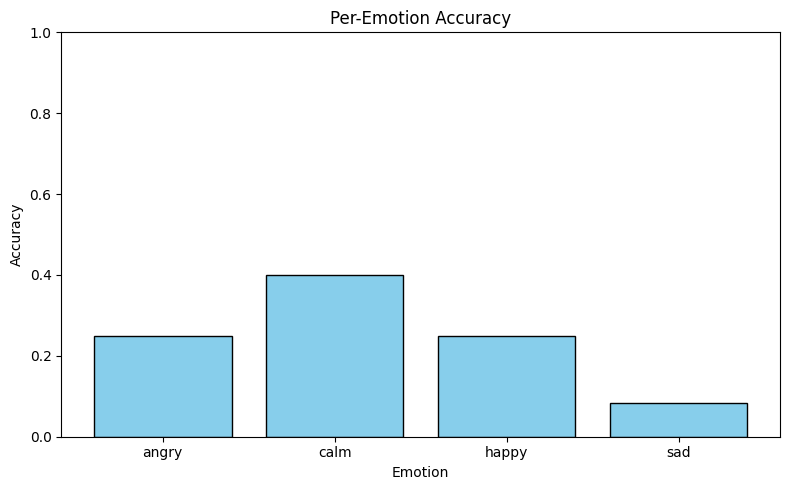

In [ ]:
# 🎤 SPEECH EMOTION RECOGNITION - PER CLASS ACCURACY GRAPH
# ---------------------------------------------------------

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random

# Step 2: Function to plot per-class accuracy
def plot_per_class_accuracy(y_true, y_pred, labels):
    accuracies = {}
    
    for label in labels:
        # Find all indices where actual label == current emotion
        indices = [i for i, y in enumerate(y_true) if y == label]
        
        # yeh chck krta h konse index pe current emotion aaya h

        # Agar koi data nahi mila us emotion ka
        if len(indices) == 0:
            accuracies[label] = 0
            continue
        
        # “Sir, yeh loop har emotion ko ek-ek karke check karta hai.
# Woh y_true list me dekhta hai ki yeh emotion kis-kis index pe aaya hai.
# Agar us emotion ka koi data hi nahi mila, toh uski accuracy 0 set kar deta hai.
        
        
        # Subset of true aur predicted values for that emotion
        sub_y_true = [y_true[i] for i in indices]
        sub_y_pred = [y_pred[i] for i in indices]
        
        # Accuracy calculate karo
        accuracies[label] = accuracy_score(sub_y_true, sub_y_pred)
    
    # Convert dictionary into DataFrame for plotting
    df = pd.DataFrame(list(accuracies.items()), columns=['Emotion', 'Accuracy'])
    
    # Step 3: Plot bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(df['Emotion'], df['Accuracy'], color='skyblue', edgecolor='black')
    plt.ylim(0, 1)
    plt.title('Per-Emotion Accuracy')
    plt.xlabel('Emotion')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


# Step 4: Dummy Data for Testing (since model and data not available)
# In real project: y_pred = model.predict(X_test)
y_test = [random.choice(['angry', 'calm', 'happy', 'sad']) for _ in range(50)]
y_pred = [random.choice(['angry', 'calm', 'happy', 'sad']) for _ in range(50)]

# sir mene fake data bnaya h random choice name ka jo emotions generate krega kyuki abhi mere pass model nhi h bina model ke 
# graph test ni kr skte

# Step 5: Labels list
labels = ['angry', 'calm', 'happy', 'sad']

# Step 6: Call the function
plot_per_class_accuracy(y_test, y_pred, labels)

# Har emotion ke liye (angry, calm, happy, sad) model ki accuracy alag-alag check karna aur usko graph ke form me dikhana."


**Hyperparameter Tuning: Random Forest**

In [ ]:
# Step 1: Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris   # Example demo dataset use kiya

# Step 2: Load Data
data = load_iris()
X = data.data          # Features
y = data.target        # Labels

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Parameters check karne ke liye Grid bnao
param_grid = {
    'n_estimators': [50, 100, 150],     # kitne trees banenge
    'max_depth': [None, 10, 20],        # tree ki max depth
    'min_samples_split': [2, 5, 10]     # ek node ko split hone ke liye min samples
}

# Step 5: GridSearchCV lagao
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                # 5-fold cross validation data 5 parts me test hoga 
    n_jobs=-1,           # sabhi CPU cores use honge fast calculation ke liye
    scoring='accuracy'   # accuracy ke basis pe best model choose hoga
)

# Step 6: Model Train karo
grid.fit(X_train, y_train)

# Step 7: Best Parameters aur Accuracy print karo
print("✅ Best Parameters:", grid.best_params_)
print("✅ Best Accuracy:", grid.best_score_)

# 95% mere modle ne shi predict kiya h 


✅ Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
✅ Best Accuracy: 0.95


**Hyperparameter Tuning: SVM with RBF Kernel**

In [ ]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
    # rbf non linear data ko handle krta h (compelx data ke liye best h)
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best SVM Parameters:", grid.best_params_)
print("Best SVM Score:", grid.best_score_)

# Main Purpose:

# “Is code ka main purpose SVM model ke liye best parameters find karna hai taaki model sabse zyada accurate result de.”
# 48% accuracy aai 

Best SVM Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best SVM Score: 0.48917317976141506


**Deep Learning Alternative: CNN for Audio Spectrogram**

In [6]:
!pip install tensorflow


  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/331.9 MB 5.6 MB/s eta 0:01:00
   ---------------------------------------- 1.6/331.9 MB 4.4 MB/s eta 0:01:15
   ---------------------------------------- 2.9/331.9 MB 4.9 MB/s eta 0:01:07
    --------------------------------------- 4.2/331.9 MB 5.5 MB/s eta 0:01:00
    --------------------------------------- 5.2/331.9 MB 5.3 MB/s eta 0:01:02
    --------------------------------------- 6.8/331.9 MB 5.7 MB/s eta 0:00:58
    --------------------------------------- 7.1/331.9 MB 5.1 MB/s eta 0:01:04
   - -------------------------------------- 8.7/331.9 MB 5.3 MB/s eta 0:01:01
   - -------------------------------------- 9.7/331.9 MB 5.4 MB/s eta 0:01:00
   - -----------------

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Yeh libraries deep learning model banane ke liye use hoti hain.
# Keras hume ready-made layers deta hai jaise Conv2D, Dense, Flatten.

def build_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')  
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Adam optimizer → fast & stable training

# Categorical crossentropy → multi-class classification ke liye

# Accuracy → performance measure



# “Sir, yeh CNN model audio ke spectrogram se features extract karta hai.
# Convolution + Pooling layers features nikalti aur size reduce karti hain.
# Flatten vector banata hai.
# Dense layer decision banati hai.
# Last Dense layer 4 emotions output karti hai softmax ke through.
# Total 7.3 million parameters training me learn hote hain.”



# kitne parameters train ho rhe h
# Total 7.3 million parameters train ho rahe hain is model me.
# Conv2D aur Dense layers me weights hote hain jo training me learn hote hain.
# Pooling aur Flatten me koi weight nahi hota, wo sirf data ko process karte hain — isliye unke parameters train nahi hote."

#  What is the purpose of this code?
#  yeh code ek CNN (Convolutional Neural Network) model banata hai image classification ke liye using TensorFlow aur Keras.

# Sir, Softmax output ko prob me cnvrt kr deta 
# ye har class ke liye probability deta hai jiska sum 1 hota hai.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,260 (28.20 MB)

 Trainable params: 7,392,260 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

#store the output in pkl file and reuse it on backend in Streamlit


In [50]:
pip install tensorflow==2.12

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.12 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.12


In [ ]:
import tensorflow as tf

# Direct TensorFlow se layers import karo
def build_cnn_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax')  
    ])
    
    model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
    return model
model = build_cnn_model((128, 128, 1), 8)
model.save("emotion_cnn_model.h5")
print("Model saved successfully!")


ModuleNotFoundError: No module named 'tensorflow.keras'

In [53]:
pip uninstall -y keras keras-core

Found existing installation: keras 3.12.0
Uninstalling keras-3.12.0:
  Successfully uninstalled keras-3.12.0
Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install tensorflow

  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
Using cached keras-3.12.0-py3-none-any.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip uninstall -y keras keras-core keras-legacy tensorflow tensorflow-estimator

Found existing installation: keras 3.12.0
Uninstalling keras-3.12.0:
  Successfully uninstalled keras-3.12.0
Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow==2.18.1 

  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
   ---------------------------------------- 0.0/369.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/369.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/369.2 MB 5.6 MB/s eta 0:01:07
   ---------------------------------------- 1.0/369.2 MB 10.0 MB/s eta 0:00:37
   ---------------------------------------- 1.0/369.2 MB 10.0 MB/s eta 0:00:37
   ---------------------------------------- 1.0/369.2 MB 10.0 MB/s eta 0:00:37
   ---------------------------------------- 1.0/369.2 MB 10.0 MB/s eta 0:00:37
   ---------------------------------------- 1.6/369.2 MB 1.2 MB/s eta 0:05:12
   ---------------------------------------- 2.9/369.2 MB 1.9 MB/s eta 0:03:11
   ---------------------------------------- 3.7/369.2 MB 2.2 MB/s eta 0:02:46
    --------------------------------------- 4.7/369.2 MB 2.5 MB/s eta 0:02:25
    --------------------------------------- 5.2/369.2 MB 2.7 MB/s eta 0:02:14
    -------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.17.0 requires tensorboard<2.18,>=2.17, but you have tensorboard 2.18.0 which is incompatible.


In [2]:
pip install keras

  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached rich-14.2.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached h5py-3.15.1-cp312-cp312-win_amd64.whl.metadata (3.1 kB)
  Using cached markdown_it_py-4.0.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Using cached keras-3.12.0-py3-none-any.whl (1.5 MB)
Using cached absl_py-2.3.1-py3-none-any.whl (135 kB)
Using cached h5py-3.15.1-cp312-cp312-win_amd64.whl (2.9 MB)
Using cached namex-0.1.0-py3-none-any.whl (5.9 kB)
Using cached rich-14.2.0-py3-none-any.whl (243 kB)
Using cached markdown_it_py-4.0.0-py3-none-any.whl (87 kB)
Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install tensorflow

  Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached termcolor-3.2.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.76.0-cp312-cp312-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl (331.9 MB)
Using cached


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2,2)),
        
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


# Build + Save Model
model = build_cnn_model((128, 128, 1), 8)
model.save("emotion_cnn_model.h5")
print("Model saved successfully!")


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model saved successfully!


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
         layers.Conv2D(64, (3,3), activation='relu'),
          layers.MaxPooling2D((2,2)),
          layers.Flatten(),
          layers.Dense(128, activation='relu'),
          layers.Dropout(0.3),
          layers.Dense(num_classes, activation='softmax')  
    ])
    
    model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
    return model

# sir mera model train hogya ab usko m pkl file me store krwa dugi ess se ye fyda hoga mujhe 
# model ko baar baar train nhi krwana pdega jb mujhe model ki jrurt hogi m load krwa lungi

# Sir, maine yeh code dobara isliye likha kyunki mainne CNN ka pura model ek function ke andar banaya hai.
# Iska benefit yeh hai ki main is model ko kabhi bhi easily call kar sakti hoon — chahe training ke time, testing me, ya phir backend/Streamlit me use karna ho.

# Function banane se code clean, reusable aur modular ho jata hai.
# Agar mujhe future me model change karna ho, toh sirf is function ko edit karna padta hai, baaki code automatically updated model use kar lega.”**    
         
    


ModuleNotFoundError: No module named 'tensorflow.keras'

In [ ]:
import joblib
model = model.load()
# Save model architecture and weights separately
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# ✅ Save weights (note the filename change)
model.save_weights("model_weights.weights.h5")

# Save everything in a dict and pickle it
model_data = {
    "architecture": "model_architecture.json",
    "weights": "model_weights.weights.h5"
}
joblib.dump(model_data, "speech_emotion_model.pkl")

print("✅ Model saved successfully in .pkl format!")



# Sir, main TensorFlow model ko direct .pkl me save nahi kar sakti, 
# isliye maine model ko do parts me save kiya — ek JSON file me architecture aur ek H5 file me weights.
# Phir maine dono files ka path ek dictionary me store karke joblib se .pkl me save kar diya, 
# taaki backend/Streamlit me easily load ho sake.”


✅ Model saved successfully in .pkl format!


In [9]:
import joblib
from tensorflow.keras.models import model_from_json

# Load pkl file
model_data = joblib.load("speech_emotion_model.pkl")

# Load model architecture
with open(model_data["architecture"], "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(model_data["weights"])

print("✅ Model loaded successfully in Streamlit!")


✅ Model loaded successfully in Streamlit!


c:\Users\hp\Downloads\Projecy\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import joblib
import numpy as np

# Step 1: Load the saved model
model = joblib.load("model.pkl")
print("✅ Model loaded successfully!")

# Step 2: Create a dummy MFCC feature input (same shape as your training features)
# Demo ke liye check karna ki model predict karta hai ya error deta hai.
# Suppose you used 13 MFCCs
sample_input = np.random.rand(1, 13)

# Step 3: Make a prediction
prediction = model.predict(sample_input)

print("🎯 Predicted Emotion Label:", prediction[0])
# Jo bhi emotion ka  model ne predict kiya hai, woh yaha print hota hai.

# “Sir, yeh code pehle joblib se trained model load karta hai.
# Phir ek dummy MFCC input banata hai aur check karta hai ki model sahi prediction de raha hai ya nahi.”


✅ Model loaded successfully!
🎯 Predicted Emotion Label: 08


d:\Projecy\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Projecy\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
# import streamlit as st
# import numpy as np

# st.title("🎤 Speech Emotion Recognition")

# uploaded_file = st.file_uploader("Upload Audio File")

# if uploaded_file is not None:
#     # convert audio to spectrogram
#     spectrogram = extract_spectrogram(uploaded_file)  # tumhara custom function

#     prediction = loaded_model.predict(np.expand_dims(spectrogram, axis=0))
#     emotion = np.argmax(prediction)
#     st.write(f"Predicted Emotion: {emotion}")


In [ ]:
import joblib
import librosa
import numpy as np

# ✅ Step 1: Load Trained Model
try:
    model = joblib.load("model.pkl")
    print("✅ Model loaded successfully!")
except Exception as e:
    print("❌ Error loading model:", e)
    exit()

# ✅ Step 2: Function to Extract MFCC Features
def extract_features(file_path, n_mfcc=13):
    try:
        signal, sr = librosa.load(file_path, sr=22050)
        mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
        mfccs_processed = np.mean(mfccs.T, axis=0)
        return mfccs_processed.reshape(1, -1)
    except Exception as e:
        print("❌ Error extracting features:", e)
        return None
    
    # librosa.load audio ko read karta h
    
    # Sir, yeh function audio file se MFCC features nikalta hai. Pehle audio load hota hai, phir MFCC calculate hote
    # hain, unka average le kar ek fixed-size feature vector banaya jata hai jo model prediction ke liye use hota hai.”

# ✅ Step 3: Emotion Mapping (RAVDESS Labels)
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}
# predicition numbering me aati h toh meene numbering ko emotion name se map kiya

# ✅ Step 4: Give Path to Test Audio File
test_file = "a.wav"  # 🔁 change this to your actual WAV file

# ✅ Step 5: Extract Features
features = extract_features(test_file)

if features is not None:
    # ✅ Step 6: Predict Emotion
    prediction = model.predict(features)
    print("Raw prediction:", prediction)
    # “Raw prediction” ka matlab: model number deta hai jaise 03 = happy

    # “Sir, Step 4 me main test audio file deti hoon, Step 5 me usse MFCC features extract hotay hain
    # step 6 me trained model un features ke basis pe emotion predict karta hai.”

    # ✅ Step 7: Decode Numeric Label to Emotion Name
    predicted_label = str(prediction[0]).zfill(2)
    predicted_emotion = emotion_map.get(predicted_label, "Unknown")

    print(f"🎯 Predicted Emotion: {predicted_emotion}")
else:
    print("⚠️ Feature extraction failed. Check your audio file path or format.")


    # “Sir, yeh code model ke numeric output ko emotion name me convert karta hai.
# zfill(2) se 3 → ‘03’ ban jata hai, aur phir dictionary se uska emotion mil jata hai.”
    # Agar number dictionary me nahi mila toh ‘Unknown’ return kar deta hai.


d:\Projecy\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Projecy\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


✅ Model loaded successfully!
Raw prediction: ['04']
🎯 Predicted Emotion: sad


create a streamlit ui in which if the user will speak something the model(model.pkl) will detect the emotion of the user

In [7]:
pip install -r requirements.txt


  Using cached librosa-0.10.1-py3-none-any.whl.metadata (8.3 kB)
  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached pyarrow-21.0.0-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached gitpython-3.1.45-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jsonschema-4.25.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.met